# Setting up 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
%cd drive/My\ Drive/KaggleDataStorm

/content/drive/My Drive/KaggleDataStorm


In [0]:
# import os
# os.environ['KAGGLE_USERNAME'] = "ds1047"
# os.environ['KAGGLE_KEY'] = "26ca78d45179f04387b81f35ba031660"

# !kaggle competitions download -c data-storm-10

# Import Libraries & Data

In [0]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import lightgbm as lgb

warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
train=pd.read_csv("credit_card_default_train.csv.zip")
test=pd.read_csv("credit_card_default_test.csv")

In [7]:
train.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [35]:
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (24000, 25)
Test shape: (6000, 24)


**Twenty four thousand data points**

# Exploratory Data Analysis

In [13]:
print(f"Number of columns :  {len(train.columns)}")
print(train.columns)

Number of columns :  25
Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')


**Column List:**

Unique:
* 'Client_ID' - Unique

Categorical:
* 'Balance_Limit_V1'
* 'Gender'
* 'EDUCATION_STATUS'
* 'MARITAL_STATUS'
* 'AGE'

--------------

* 'PAY_JULY'
* 'PAY_AUG'
* 'PAY_SEP'
* 'PAY_OCT'
* 'PAY_NOV'
* 'PAY_DEC'


PAY_MONTH :: "History of past payments" (-2 = paid two months in advance), (-1 = paid one month in advance), (0 = payment due current month), ( 1 = payment delay for one month), (2 = payment delay for two months), (8 = payment delay for eight months), (9 = payment delay for nine months and above)

---------------

Continuous:
* 'DUE_AMT_JULY'
* 'DUE_AMT_AUG'
* 'DUE_AMT_SEP'
* 'DUE_AMT_OCT'
* 'DUE_AMT_NOV'
* 'DUE_AMT_DEC'
* 'PAID_AMT_JULY'
* 'PAID_AMT_AUG'
* 'PAID_AMT_SEP'
* 'PAID_AMT_OCT'
* 'PAID_AMT_NOV'
* 'PAID_AMT_DEC'

Target:
* 'NEXT_MONTH_DEFAULT'




In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
Client_ID             24000 non-null object
Balance_Limit_V1      24000 non-null object
Gender                24000 non-null object
EDUCATION_STATUS      24000 non-null object
MARITAL_STATUS        24000 non-null object
AGE                   24000 non-null object
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          240

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
Client_ID           6000 non-null object
Balance_Limit_V1    6000 non-null object
Gender              6000 non-null object
EDUCATION_STATUS    6000 non-null object
MARITAL_STATUS      6000 non-null object
AGE                 6000 non-null object
PAY_JULY            6000 non-null int64
PAY_AUG             6000 non-null int64
PAY_SEP             6000 non-null int64
PAY_OCT             6000 non-null int64
PAY_NOV             6000 non-null int64
PAY_DEC             6000 non-null int64
DUE_AMT_JULY        6000 non-null int64
DUE_AMT_AUG         6000 non-null int64
DUE_AMT_SEP         6000 non-null int64
DUE_AMT_OCT         6000 non-null int64
DUE_AMT_NOV         6000 non-null int64
DUE_AMT_DEC         6000 non-null int64
PAID_AMT_JULY       6000 non-null int64
PAID_AMT_AUG        6000 non-null int64
PAID_AMT_SEP        6000 non-null int64
PAID_AMT_OCT        6000 non-null int64
PAID_AM

In [0]:
cat_features = ['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'AGE']
due_features = ['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC']
paid_features = ['PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC']
pay_int = ['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']

In [17]:
# Number of unique classes in each object column
train[cat_features+pay_int].nunique()

Balance_Limit_V1     8
Gender               2
EDUCATION_STATUS     3
MARITAL_STATUS       2
AGE                  4
PAY_JULY            11
PAY_AUG             11
PAY_SEP             11
PAY_OCT             11
PAY_NOV             10
PAY_DEC             10
dtype: int64

In [18]:
test[cat_features+pay_int].nunique()

Balance_Limit_V1     8
Gender               2
EDUCATION_STATUS     3
MARITAL_STATUS       2
AGE                  4
PAY_JULY            11
PAY_AUG             10
PAY_SEP             10
PAY_OCT              9
PAY_NOV              9
PAY_DEC              9
dtype: int64

## Utils

In [0]:
def basic_describe(features, train=train):
  """ return basic statistics of the the data"""
  df = train[features].describe()
  pd.options.display.float_format = '{:.2f}'.format
  return df

In [0]:
def plot_count(column, train=train):
  print(train[column].value_counts())
  # Plot member count 
  plt.figure(figsize=(10,5))
  sns.countplot(train[column])
  plt.title(column)
  plt.show()

In [0]:
def draw_distplot(column, train=train):
  sns.set(style="whitegrid")
  sns.dark_palette("blue")
  plt.figure(figsize=(16,5))
  plt.title(column,fontsize=15)
  sns.distplot(train[column])
  plt.show()

In [0]:
def boxplot_group(feature, df=train):
  fig, ax = plt.subplots()
  fig.set_size_inches(8, 15)
  ax = sns.boxplot(x='NEXT_MONTH_DEFAULT', y=feature, data=df)
  plt.title(feature + " for Default")

## Explore Categorical Variables

********** Train Set **********
1M       5951
200K     5159
100K     3449
400K     3065
 500K    2790
300K     2411
1.5M     1138
2.5M       37
Name: Balance_Limit_V1, dtype: int64


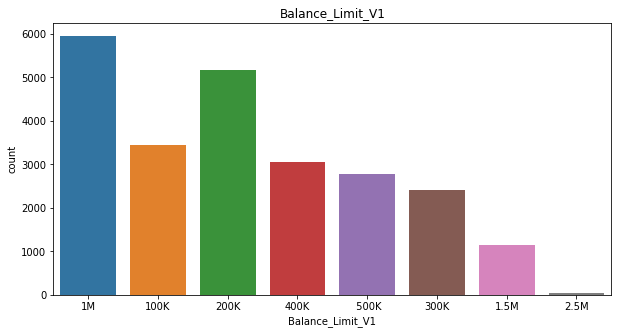

********** Test Set ***********
1M       1466
200K     1329
100K      862
400K      749
 500K     692
300K      602
1.5M      292
2.5M        8
Name: Balance_Limit_V1, dtype: int64


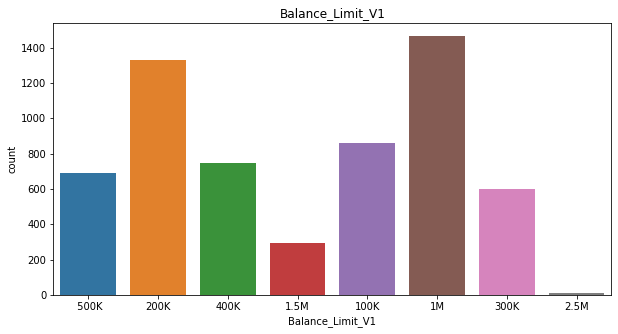

In [39]:
print("********** Train Set **********")
plot_count('Balance_Limit_V1')
print("********** Test Set ***********")
plot_count('Balance_Limit_V1', test)

********** Train Set **********
M    14460
F     9540
Name: Gender, dtype: int64


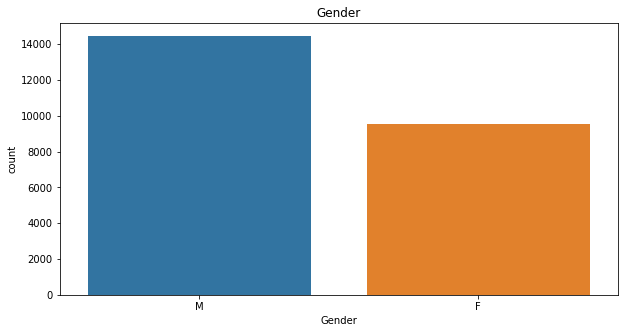

********** Test Set ***********
M    3652
F    2348
Name: Gender, dtype: int64


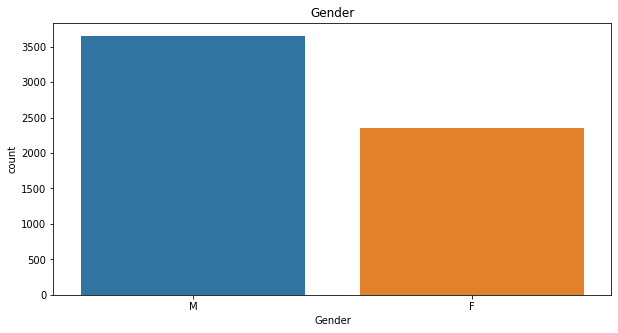

In [40]:
print("********** Train Set **********")
plot_count('Gender')
print("********** Test Set ***********")
plot_count('Gender', test)

********** Train Set **********
Other          11597
Graduate        8478
High School     3925
Name: EDUCATION_STATUS, dtype: int64


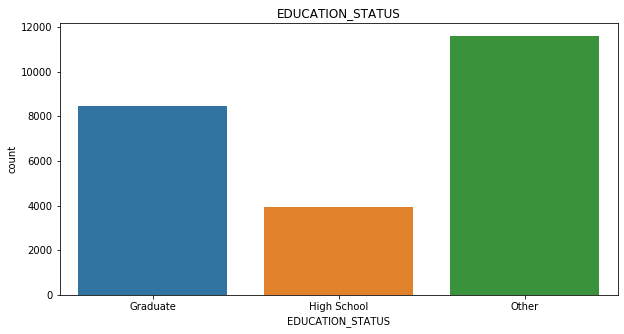

********** Test Set ***********
Other          2901
Graduate       2107
High School     992
Name: EDUCATION_STATUS, dtype: int64


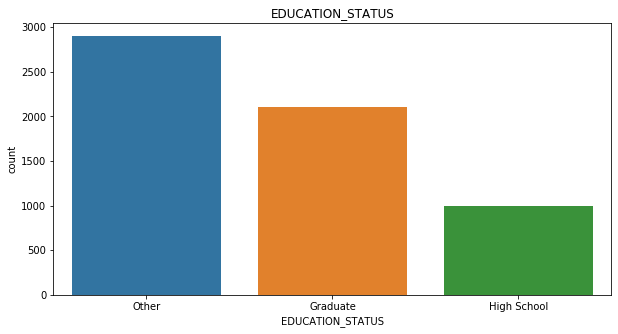

In [41]:
print("********** Train Set **********")
plot_count('EDUCATION_STATUS')
print("********** Test Set ***********")
plot_count('EDUCATION_STATUS', test)

********** Train Set **********
Other     13070
Single    10930
Name: MARITAL_STATUS, dtype: int64


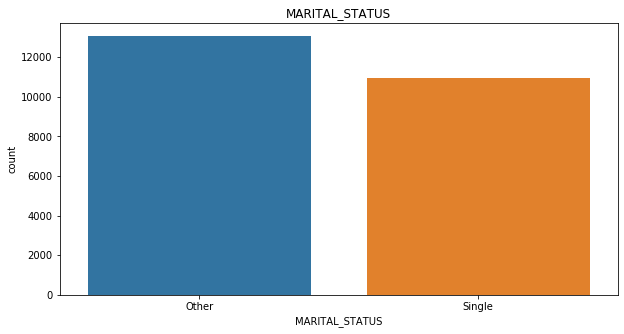

********** Test Set ***********
Other     3271
Single    2729
Name: MARITAL_STATUS, dtype: int64


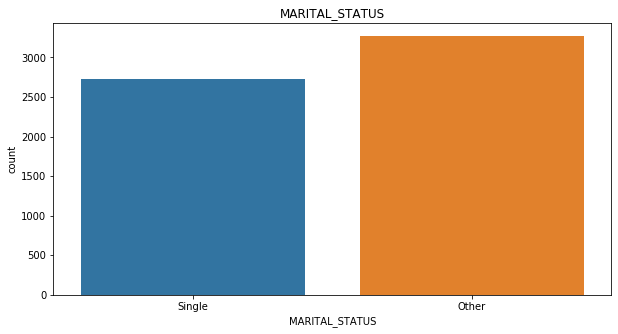

In [42]:
print("********** Train Set **********")
plot_count('MARITAL_STATUS')
print("********** Test Set ***********")
plot_count('MARITAL_STATUS', test)

********** Train Set **********
31-45           12124
Less than 30     7638
46-65            4150
More than 65       88
Name: AGE, dtype: int64


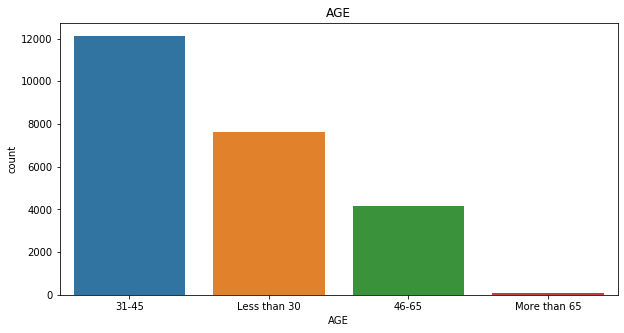

********** Test Set ***********
31-45           2972
Less than 30    1980
46-65           1026
More than 65      22
Name: AGE, dtype: int64


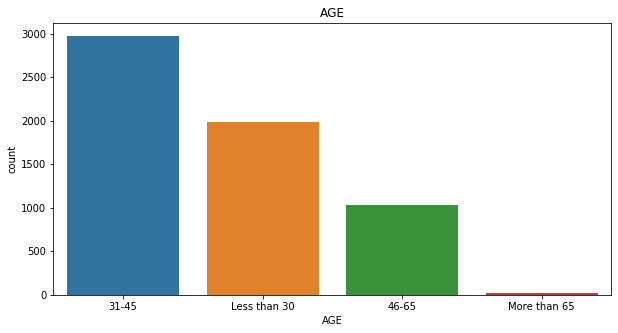

In [43]:
print("********** Train Set **********")
plot_count('AGE')
print("********** Test Set ***********")
plot_count('AGE', test)

********** Train Set **********
 0    11788
-1     4534
 1     2956
-2     2205
 2     2140
 3      258
 4       66
 5       23
 8       14
 6       10
 7        6
Name: PAY_JULY, dtype: int64


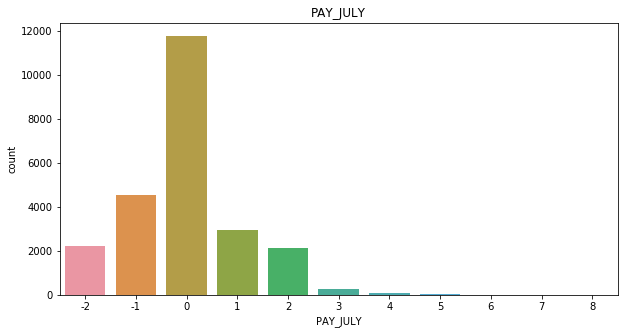

********** Test Set ***********
 0    2949
-1    1152
 1     732
-2     554
 2     527
 3      64
 4      10
 8       5
 7       3
 5       3
 6       1
Name: PAY_JULY, dtype: int64


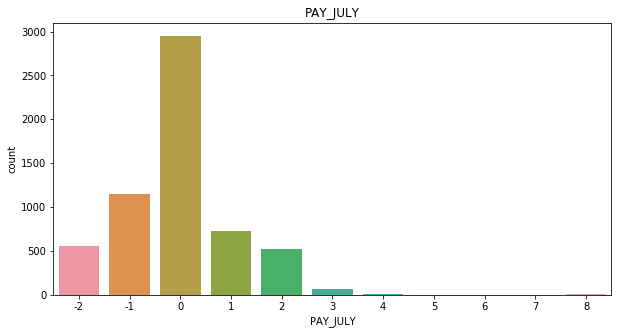

Train set uniques: 11
Test set uniques: 11


In [50]:
print("********** Train Set **********")
plot_count('PAY_JULY')
print("********** Test Set ***********")
plot_count('PAY_JULY', test)
print("Train set uniques: {}".format(train['PAY_JULY'].nunique()))
print("Test set uniques: {}".format(test['PAY_JULY'].nunique()))

********** Train Set **********
 0    12562
-1     4847
 2     3150
-2     3014
 3      271
 4       84
 5       24
 1       24
 7       15
 6        8
 8        1
Name: PAY_AUG, dtype: int64


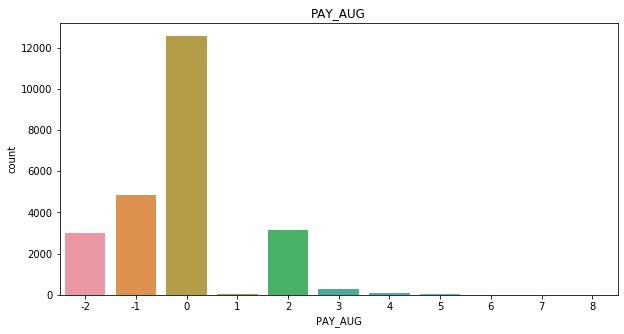

********** Test Set ***********
 0    3168
-1    1203
 2     777
-2     768
 3      55
 4      15
 7       5
 6       4
 1       4
 5       1
Name: PAY_AUG, dtype: int64


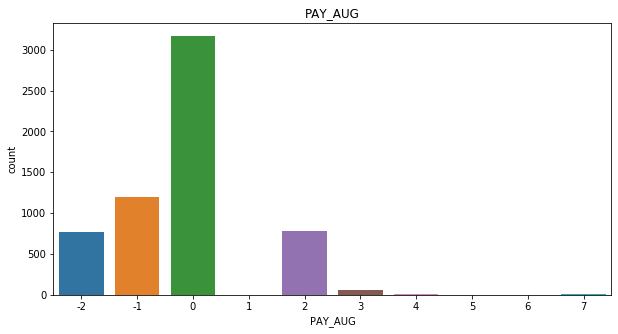

Train set uniques: 11
Test set uniques: 10


In [51]:
print("********** Train Set **********")
plot_count('PAY_AUG')
print("********** Test Set ***********")
plot_count('PAY_AUG', test)
print("Train set uniques: {}".format(train['PAY_AUG'].nunique()))
print("Test set uniques: {}".format(test['PAY_AUG'].nunique()))

********** Train Set **********
 0    12609
-1     4730
-2     3240
 2     3097
 3      198
 4       65
 7       21
 6       17
 5       17
 1        4
 8        2
Name: PAY_SEP, dtype: int64


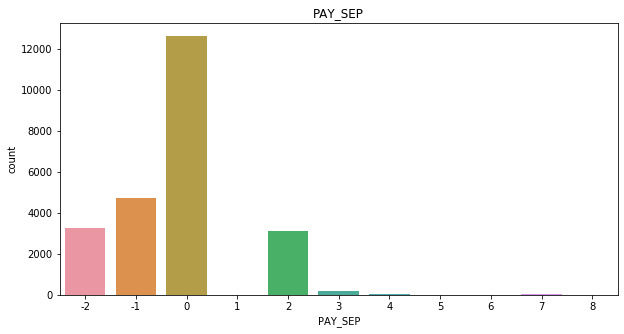

********** Test Set ***********
 0    3155
-1    1208
-2     845
 2     722
 3      42
 4      11
 7       6
 6       6
 5       4
 8       1
Name: PAY_SEP, dtype: int64


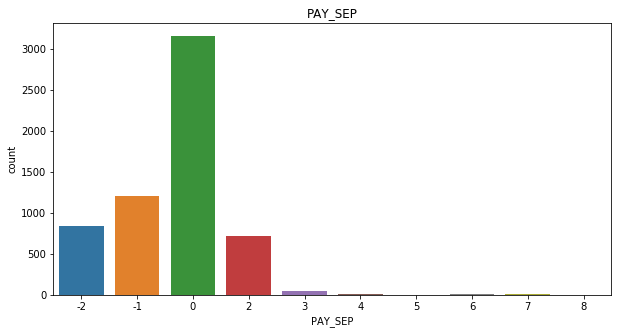

Train set uniques: 11
Test set uniques: 10


In [52]:
print("********** Train Set **********")
plot_count('PAY_SEP')
print("********** Test Set ***********")
plot_count('PAY_SEP', test)
print("Train set uniques: {}".format(train['PAY_SEP'].nunique()))
print("Test set uniques: {}".format(test['PAY_SEP'].nunique()))

********** Train Set **********
 0    13199
-1     4514
-2     3453
 2     2548
 3      156
 4       53
 7       42
 5       27
 6        4
 8        2
 1        2
Name: PAY_OCT, dtype: int64


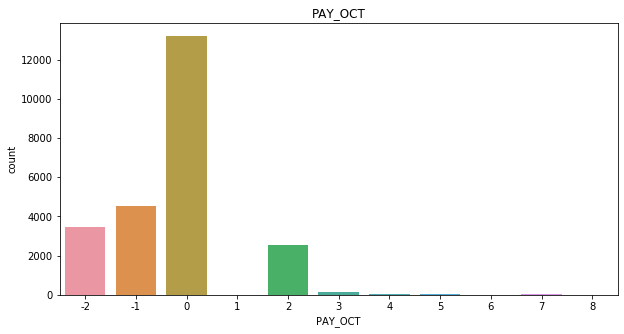

********** Test Set ***********
 0    3256
-1    1173
-2     895
 2     611
 3      24
 7      16
 4      16
 5       8
 6       1
Name: PAY_OCT, dtype: int64


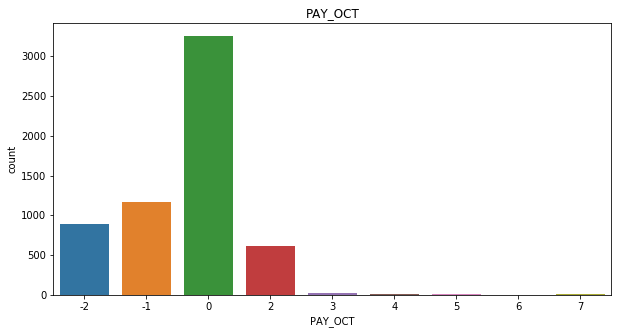

Train set uniques: 11
Test set uniques: 9


In [53]:
print("********** Train Set **********")
plot_count('PAY_OCT')
print("********** Test Set ***********")
plot_count('PAY_OCT', test)
print("Train set uniques: {}".format(train['PAY_OCT'].nunique()))
print("Test set uniques: {}".format(test['PAY_OCT'].nunique()))

********** Train Set **********
 0    13581
-1     4415
-2     3605
 2     2124
 3      145
 4       69
 7       44
 5       14
 6        2
 8        1
Name: PAY_NOV, dtype: int64


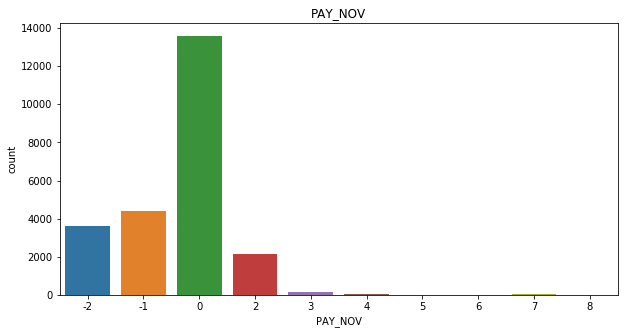

********** Test Set ***********
 0    3366
-1    1124
-2     941
 2     502
 3      33
 4      15
 7      14
 5       3
 6       2
Name: PAY_NOV, dtype: int64


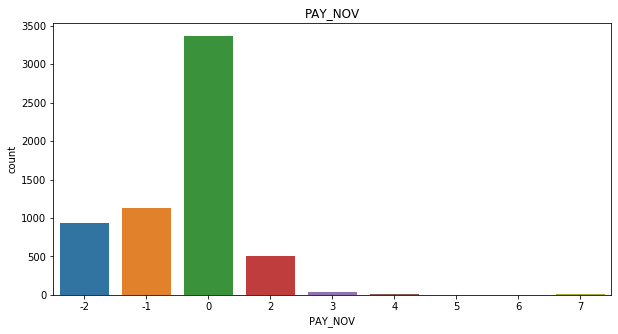

Train set uniques: 10
Test set uniques: 9


In [54]:
print("********** Train Set **********")
plot_count('PAY_NOV')
print("********** Test Set ***********")
plot_count('PAY_NOV', test)
print("Train set uniques: {}".format(train['PAY_NOV'].nunique()))
print("Test set uniques: {}".format(test['PAY_NOV'].nunique()))

********** Train Set **********
 0    13045
-1     4591
-2     3885
 2     2231
 3      148
 4       39
 7       34
 6       16
 5        9
 8        2
Name: PAY_DEC, dtype: int64


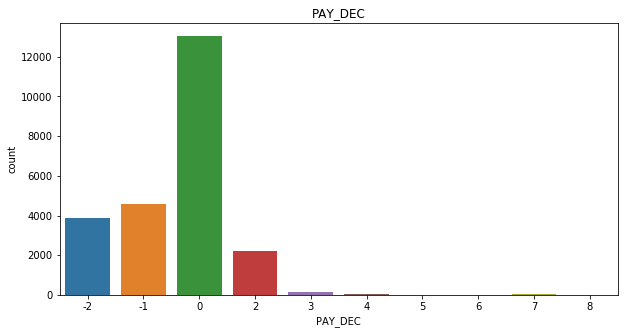

********** Test Set ***********
 0    3241
-1    1149
-2    1010
 2     535
 3      36
 7      12
 4      10
 5       4
 6       3
Name: PAY_DEC, dtype: int64


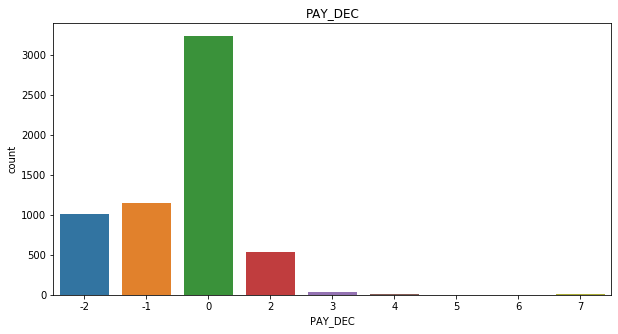

Train set uniques: 10
Test set uniques: 9


In [55]:
print("********** Train Set **********")
plot_count('PAY_DEC')
print("********** Test Set ***********")
plot_count('PAY_DEC', test)
print("Train set uniques: {}".format(train['PAY_DEC'].nunique()))
print("Test set uniques: {}".format(test['PAY_DEC'].nunique()))

0    18670
1     5330
Name: NEXT_MONTH_DEFAULT, dtype: int64


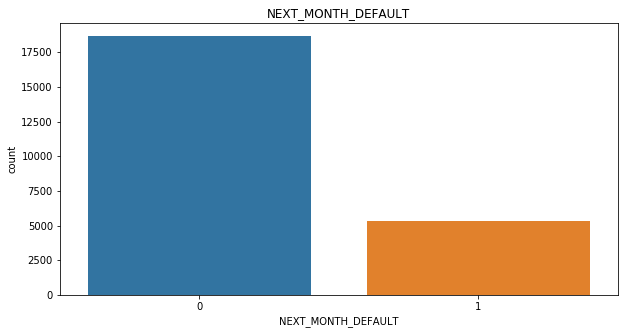

In [56]:
plot_count('NEXT_MONTH_DEFAULT')

## Explore Continuous Data

In [57]:
basic_describe(due_features)

,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC
count,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00
mean,118869.73,114072.73,109243.53,100357.26,93776.99,90340.68
std,171042.42,165241.39,161473.65,149007.08,141738.94,138723.70
min,-382490.00,-161185.00,-142079.00,-392700.00,-187882.00,-784483.00
25%,8246.25,6968.75,6238.50,5429.00,4179.75,2913.00
50%,51568.50,48717.00,46411.50,44105.00,41863.00,39409.00
75%,156274.50,148905.00,140162.25,126975.00,116926.25,114435.25
max,2228020.00,2272881.00,3844046.00,2059564.00,2141765.00,2221444.00


**A negative sign before the amount due in your credit card statement means that you have overpaid the due amount on your credit card. This amount would be adjusted in your next credit card bill.**

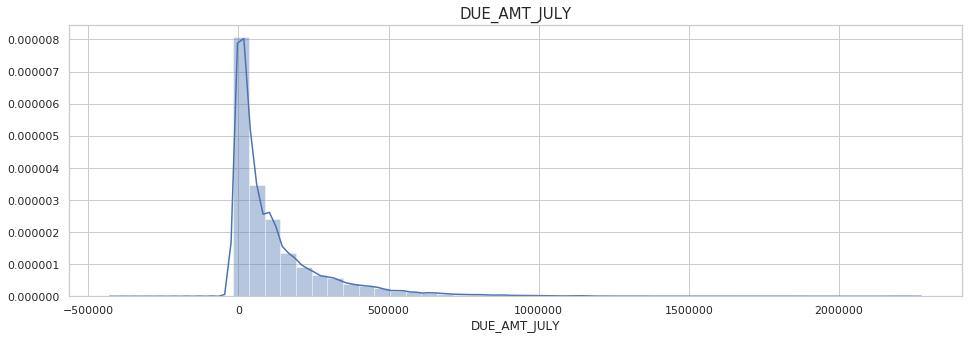

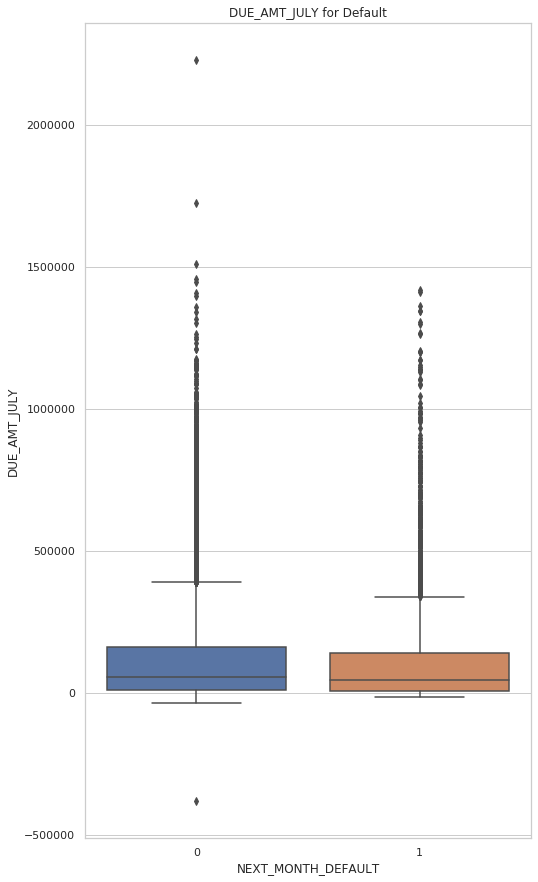

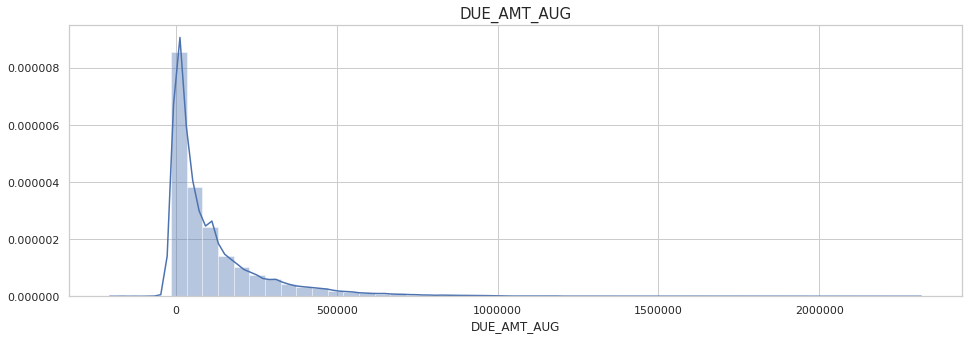

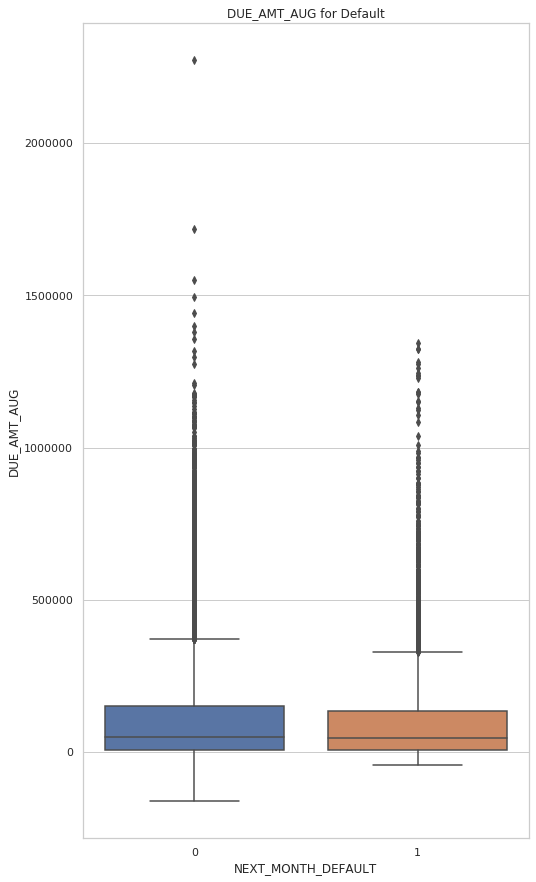

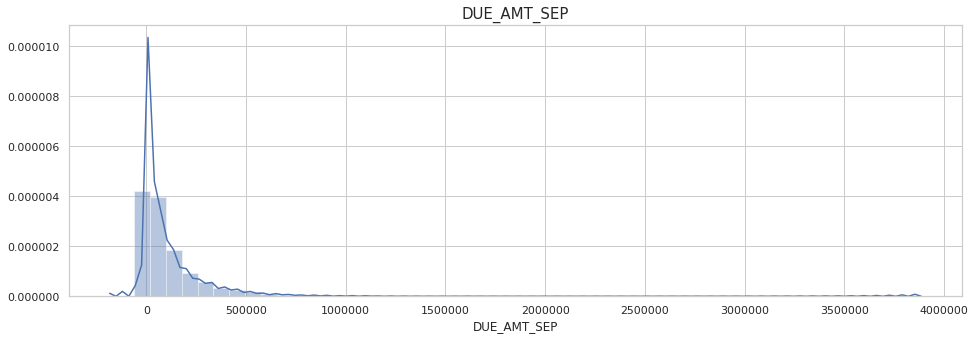

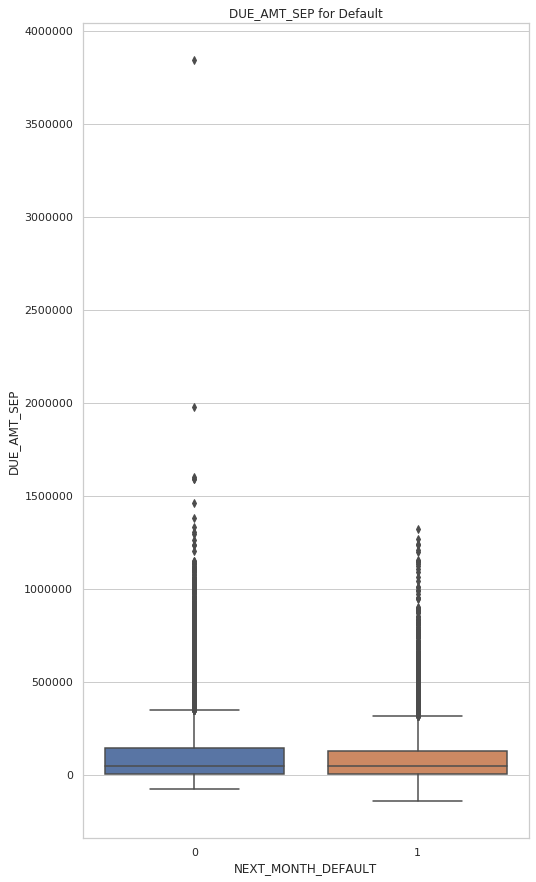

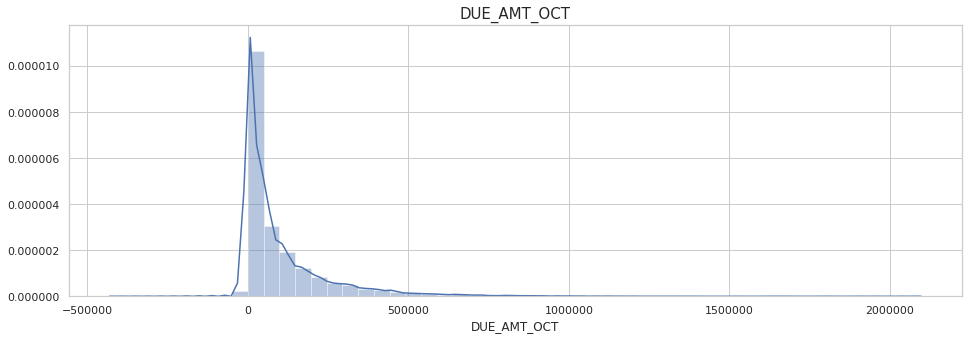

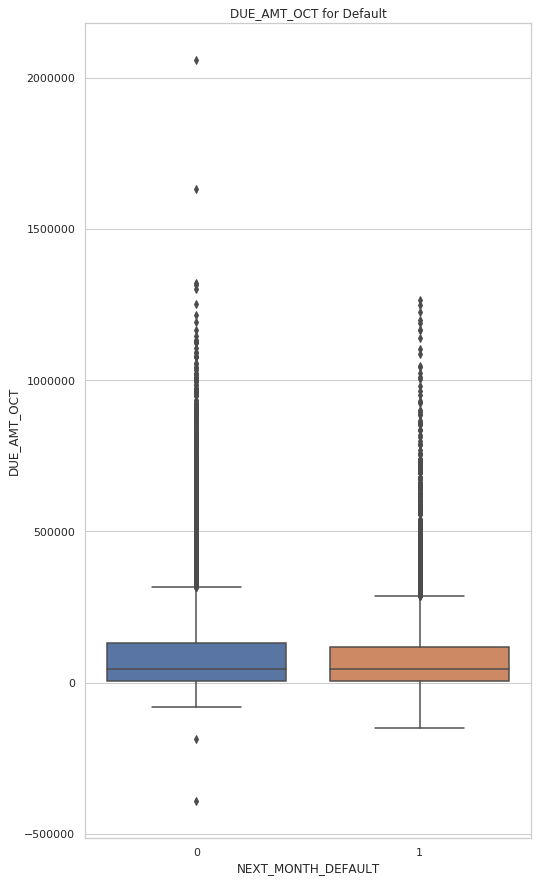

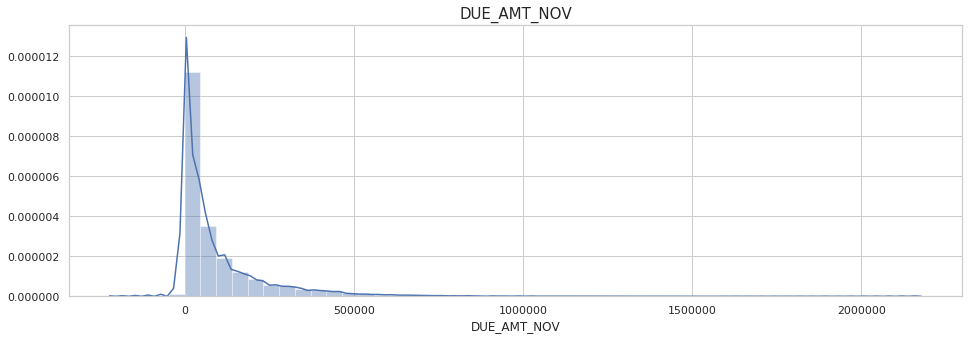

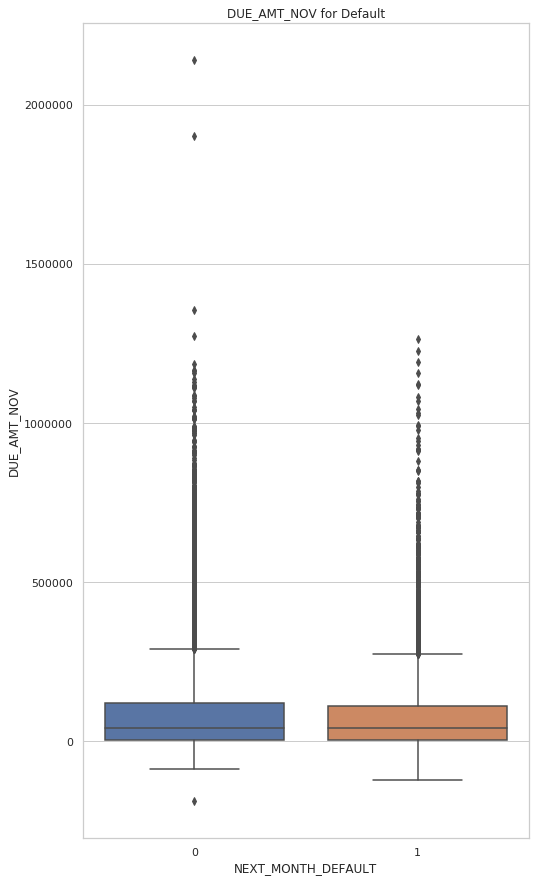

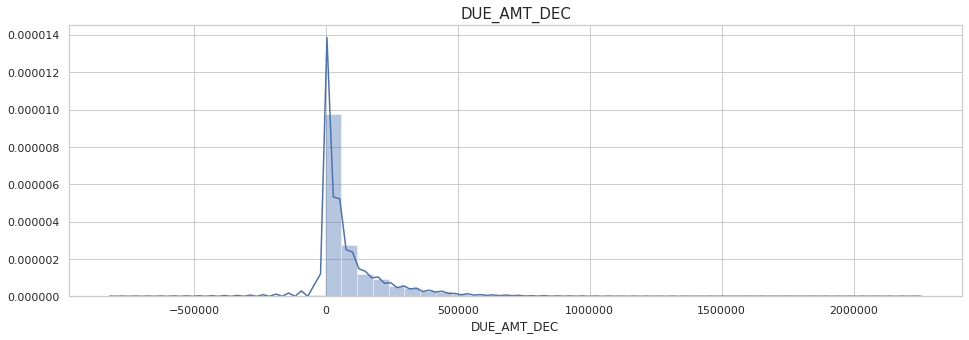

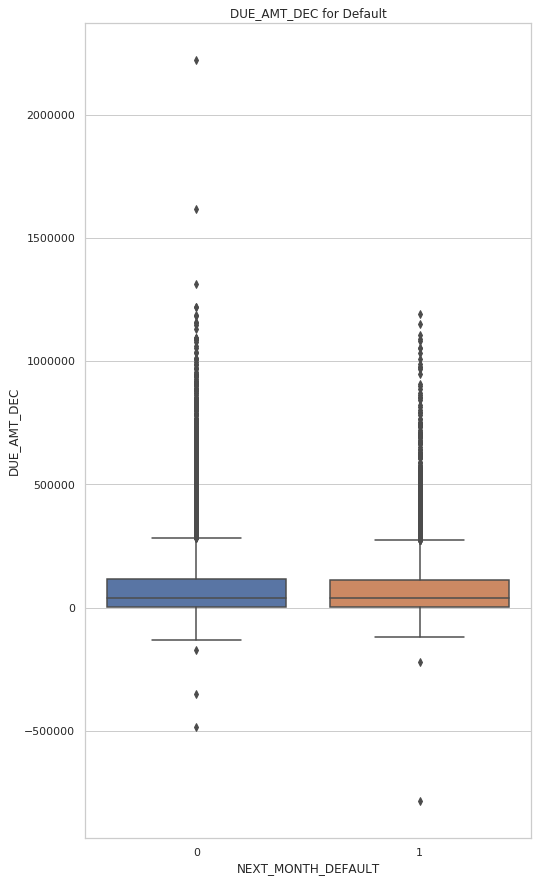

In [72]:
for feature in due_features:
  draw_distplot(feature)
  boxplot_group(feature)

In [73]:
basic_describe(paid_features)

,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
count,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00
mean,13306.48,13866.75,12093.12,11225.27,11174.74,12301.22
std,39357.42,56485.88,40659.24,36246.93,36040.82,42338.48
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,2310.00,1956.00,901.00,693.00,610.00,307.00
50%,4920.00,4646.50,4197.00,3465.00,3465.00,3465.00
75%,11605.00,11550.00,10626.00,9360.00,9411.50,9252.50
max,2017905.00,3890638.00,2069852.00,1434510.00,965557.00,1221218.00


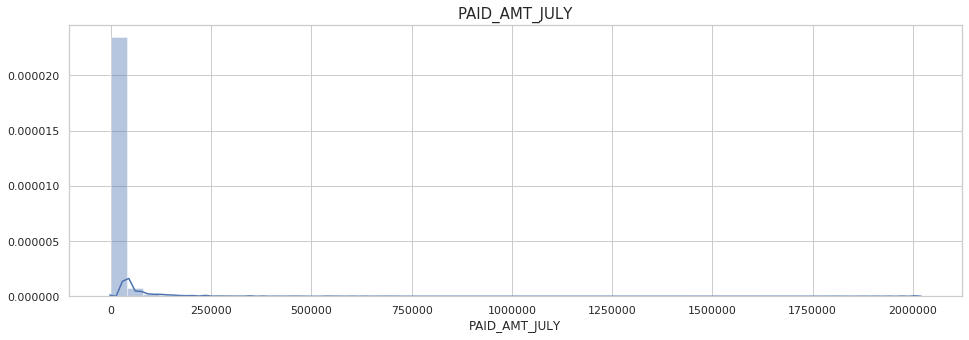

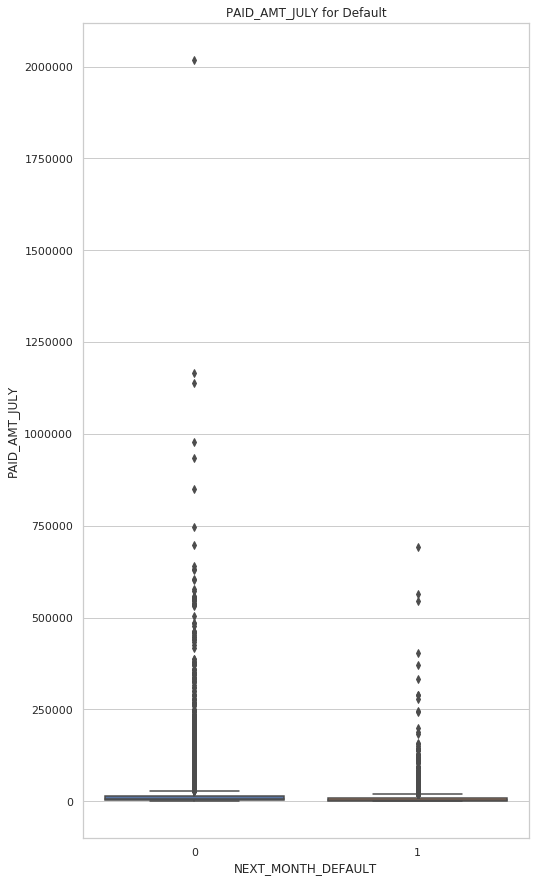

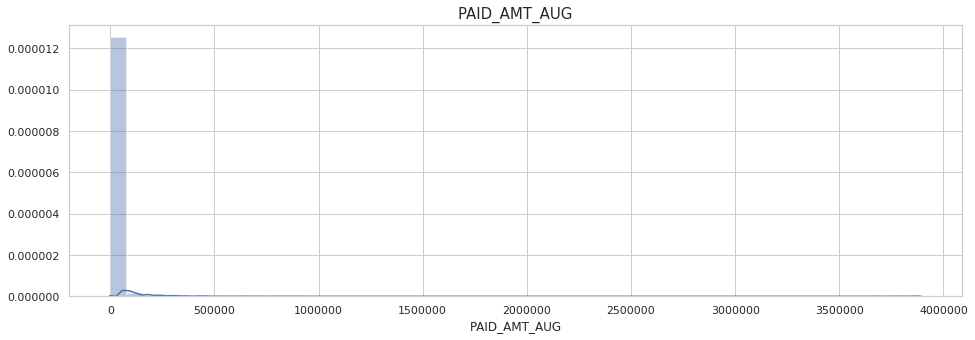

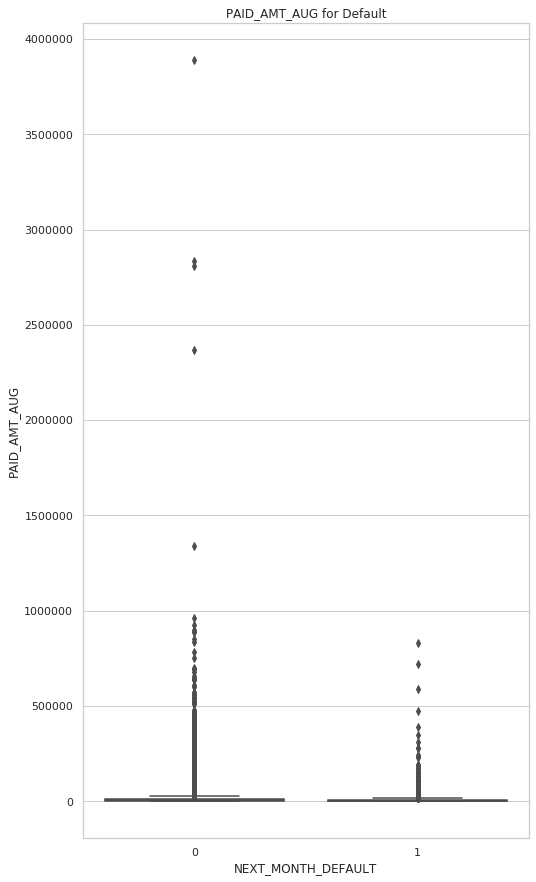

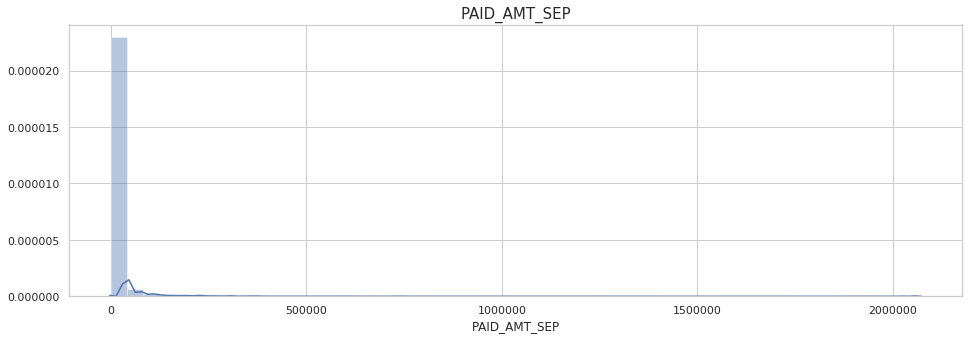

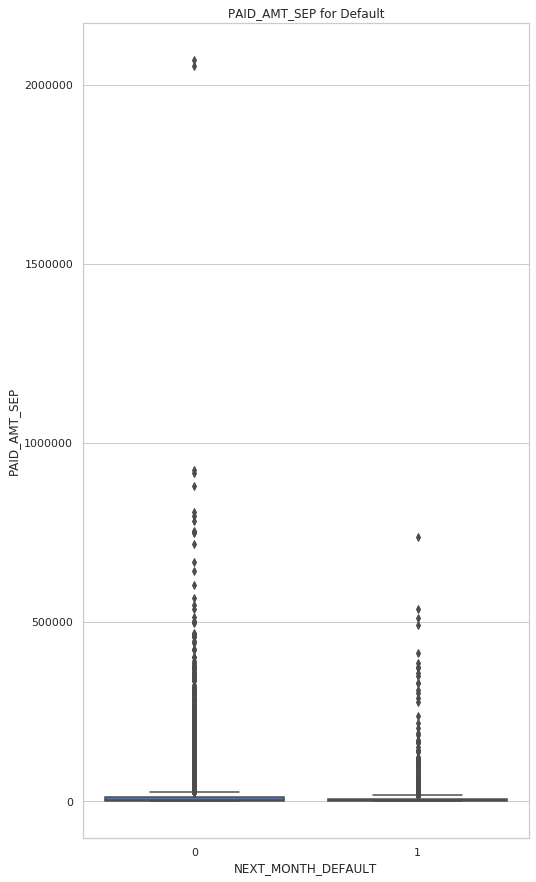

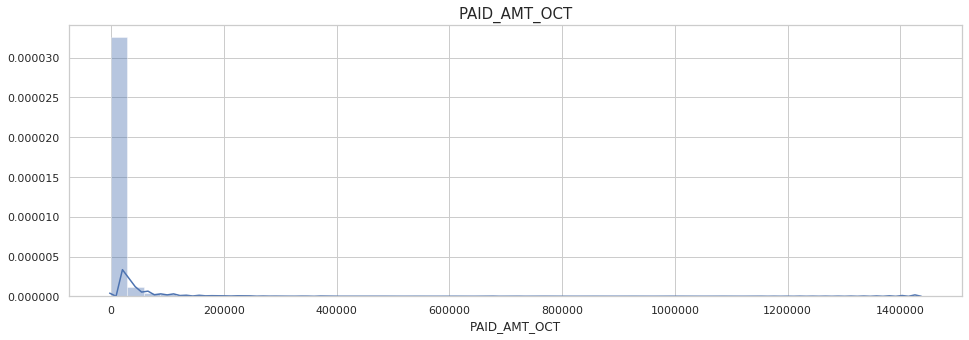

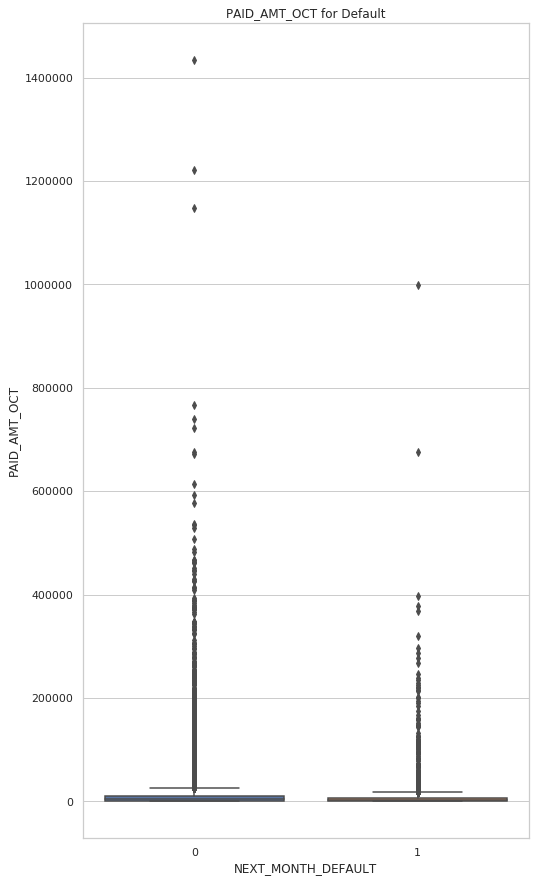

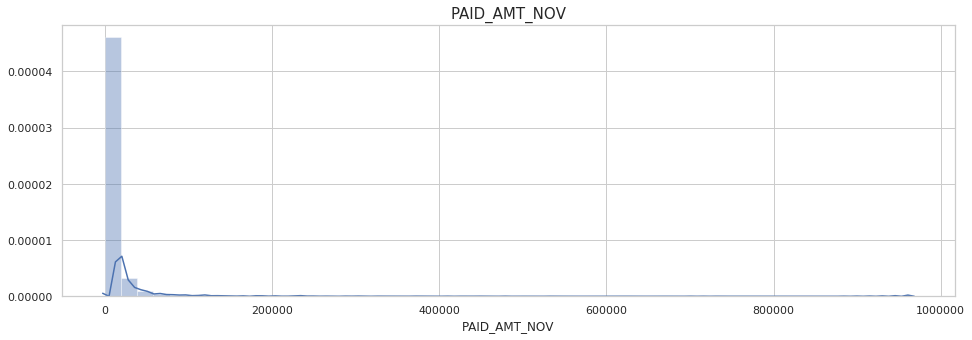

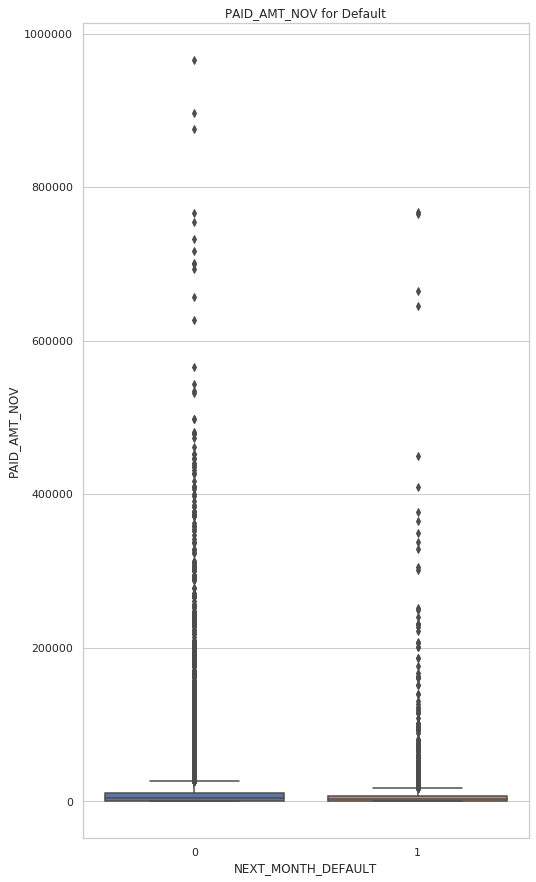

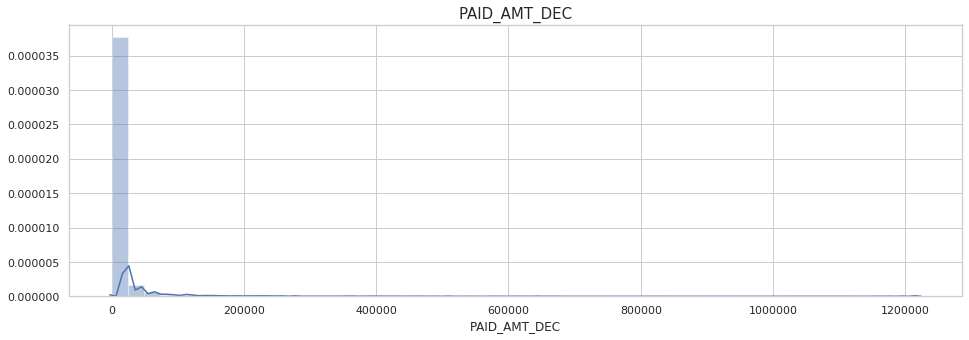

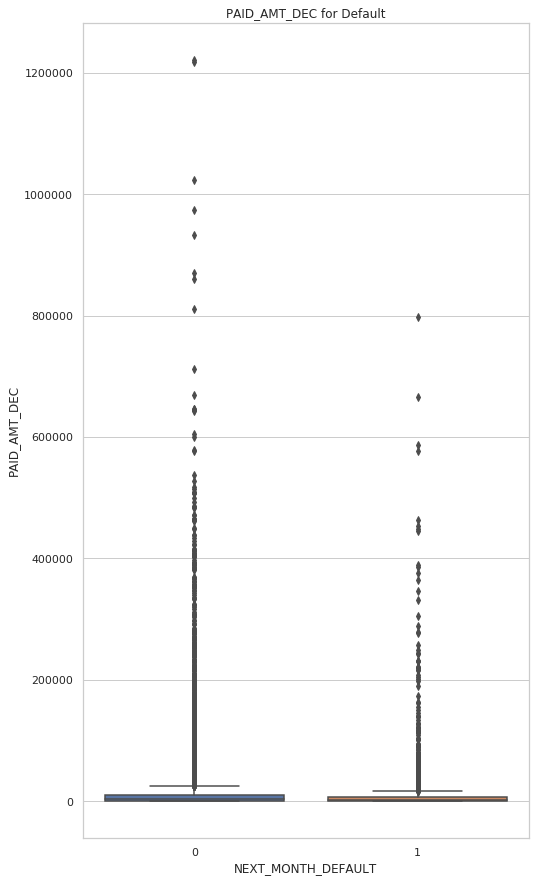

In [74]:
for feature in paid_features:
  draw_distplot(feature)
  boxplot_group(feature)

# Feature Engineering

### Categorical Variable Preprocessing

In [0]:
train=pd.read_csv("credit_card_default_train.csv.zip")
test=pd.read_csv("credit_card_default_test.csv")

train_test = pd.concat([train, test], axis=0)

In [76]:
train_test.head()

,AGE,Balance_Limit_V1,Client_ID,DUE_AMT_AUG,DUE_AMT_DEC,DUE_AMT_JULY,DUE_AMT_NOV,DUE_AMT_OCT,DUE_AMT_SEP,EDUCATION_STATUS,Gender,MARITAL_STATUS,NEXT_MONTH_DEFAULT,PAID_AMT_AUG,PAID_AMT_DEC,PAID_AMT_JULY,PAID_AMT_NOV,PAID_AMT_OCT,PAID_AMT_SEP,PAY_AUG,PAY_DEC,PAY_JULY,PAY_NOV,PAY_OCT,PAY_SEP
0,31-45,1M,A2,3389,-13982,3248,162772,39418,6004,Graduate,M,Other,0.00,6004,538165,3437,0,162772,39418,-1,-1,-1,-1,-1,-1
1,Less than 30,1M,A3,151818,124590,353351,80811,43530,26948,High School,F,Other,0.00,46200,33666,151818,942,80811,43530,-1,0,0,-1,-1,-1
2,31-45,100K,A4,16082,0,16681,0,0,15477,High School,F,Single,1.00,0,0,0,0,0,0,3,-2,4,-2,2,2
3,31-45,200K,A5,92848,102740,90457,100353,97309,95193,Graduate,F,Single,1.00,3890,3918,3855,4049,4620,3696,0,0,2,0,0,0
4,31-45,1M,A6,419466,453899,429556,445271,435354,429785,Graduate,F,Other,0.00,20790,17325,0,16401,17325,16170,2,0,2,0,0,0


In [77]:
train_test.tail()

,AGE,Balance_Limit_V1,Client_ID,DUE_AMT_AUG,DUE_AMT_DEC,DUE_AMT_JULY,DUE_AMT_NOV,DUE_AMT_OCT,DUE_AMT_SEP,EDUCATION_STATUS,Gender,MARITAL_STATUS,NEXT_MONTH_DEFAULT,PAID_AMT_AUG,PAID_AMT_DEC,PAID_AMT_JULY,PAID_AMT_NOV,PAID_AMT_OCT,PAID_AMT_SEP,PAY_AUG,PAY_DEC,PAY_JULY,PAY_NOV,PAY_OCT,PAY_SEP
5995,31-45,1M,A11104,515604,461148,512728,475236,470226,522982,High School,M,Other,nan,23100,16170,21945,18457,17325,16401,0,0,0,0,0,0
5996,31-45,1.5M,A2781,1155,-7,1610,1065,0,0,Graduate,F,Single,nan,0,0,1167,7,1065,0,-1,-1,-1,-1,-2,-1
5997,31-45,300K,A1767,106422,93403,188646,87965,85075,79508,Other,M,Single,nan,4620,11550,5683,6930,4620,6930,0,0,0,0,0,0
5998,46-65,200K,A1850,1677,34650,1677,34650,34650,35574,High School,M,Single,nan,35574,231,0,0,0,0,2,0,-1,0,0,-1
5999,31-45,1.5M,A26905,396315,354234,359944,322839,351963,426846,Other,F,Single,nan,46757,46285,46200,46549,46244,46556,0,0,0,0,0,0


In [78]:
train_test.shape

(30000, 25)

#### Combine feature for month delayed

In [0]:
for feature in pay_int:
  train_test.loc[train_test[feature] <= 0,feature]=0

In [80]:
train_test['delayed_months'] = train_test[pay_int].sum(axis=1)
train_test.head()

,AGE,Balance_Limit_V1,Client_ID,DUE_AMT_AUG,DUE_AMT_DEC,DUE_AMT_JULY,DUE_AMT_NOV,DUE_AMT_OCT,DUE_AMT_SEP,EDUCATION_STATUS,Gender,MARITAL_STATUS,NEXT_MONTH_DEFAULT,PAID_AMT_AUG,PAID_AMT_DEC,PAID_AMT_JULY,PAID_AMT_NOV,PAID_AMT_OCT,PAID_AMT_SEP,PAY_AUG,PAY_DEC,PAY_JULY,PAY_NOV,PAY_OCT,PAY_SEP,delayed_months
0,31-45,1M,A2,3389,-13982,3248,162772,39418,6004,Graduate,M,Other,0.00,6004,538165,3437,0,162772,39418,0,0,0,0,0,0,0
1,Less than 30,1M,A3,151818,124590,353351,80811,43530,26948,High School,F,Other,0.00,46200,33666,151818,942,80811,43530,0,0,0,0,0,0,0
2,31-45,100K,A4,16082,0,16681,0,0,15477,High School,F,Single,1.00,0,0,0,0,0,0,3,0,4,0,2,2,11
3,31-45,200K,A5,92848,102740,90457,100353,97309,95193,Graduate,F,Single,1.00,3890,3918,3855,4049,4620,3696,0,0,2,0,0,0,2
4,31-45,1M,A6,419466,453899,429556,445271,435354,429785,Graduate,F,Other,0.00,20790,17325,0,16401,17325,16170,2,0,2,0,0,0,4


In [0]:
numerical_features = due_features+ paid_features+['delayed_months']

In [82]:
numerical_features

['DUE_AMT_JULY',
 'DUE_AMT_AUG',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT',
 'PAID_AMT_NOV',
 'PAID_AMT_DEC',
 'delayed_months']

#### Encoding Categorical Variables

In [0]:
train_test = pd.get_dummies(data=train_test, columns=cat_features, drop_first=True)

In [85]:
train_processed = train_test[train_test['NEXT_MONTH_DEFAULT'].notna()]
train_processed.shape

(24000, 35)

In [84]:
test_processed = train_test[train_test['NEXT_MONTH_DEFAULT'].isna()]
test_processed.shape

(6000, 35)

### Continuous Variable Preprocessing

In [0]:
for feature in due_features:
  scaler = MinMaxScaler(feature_range=(-1,1)).fit(np.array(train_processed[feature]).reshape(-1, 1))
  train_processed[feature] = scaler.transform(np.array(train_processed[feature]).reshape(-1, 1))
  test_processed[feature] = scaler.transform(np.array(test_processed[feature]).reshape(-1, 1))

In [89]:
display(basic_describe(due_features, train_processed))
display(basic_describe(due_features, test_processed))

,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC
count,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00
mean,-0.62,-0.77,-0.87,-0.60,-0.76,-0.42
std,0.13,0.14,0.08,0.12,0.12,0.09
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-0.70,-0.86,-0.93,-0.68,-0.84,-0.48
50%,-0.67,-0.83,-0.91,-0.64,-0.80,-0.45
75%,-0.59,-0.75,-0.86,-0.58,-0.74,-0.40
max,1.00,1.00,1.00,1.00,1.00,1.00


,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,-0.62,-0.78,-0.88,-0.60,-0.76,-0.42
std,0.13,0.13,0.08,0.12,0.12,0.09
min,-0.98,-0.88,-1.11,-0.73,-0.96,-0.51
25%,-0.70,-0.86,-0.93,-0.68,-0.84,-0.48
50%,-0.67,-0.83,-0.91,-0.64,-0.80,-0.45
75%,-0.59,-0.75,-0.86,-0.58,-0.74,-0.40
max,0.39,0.23,-0.26,0.50,0.20,0.29


In [0]:
for feature in paid_features:
  scaler = MinMaxScaler().fit(np.array(train_processed[feature]).reshape(-1, 1))
  train_processed[feature] = scaler.transform(np.array(train_processed[feature]).reshape(-1, 1))
  test_processed[feature] = scaler.transform(np.array(test_processed[feature]).reshape(-1, 1))

In [91]:
display(basic_describe(paid_features, train_processed))
display(basic_describe(paid_features, test_processed))

,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
count,24000.00,24000.00,24000.00,24000.00,24000.00,24000.00
mean,0.01,0.00,0.01,0.01,0.01,0.01
std,0.02,0.01,0.02,0.03,0.04,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.01,0.00,0.01,0.01,0.01,0.01
max,1.00,1.00,1.00,1.00,1.00,1.00


,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,0.01,0.00,0.01,0.01,0.01,0.01
std,0.02,0.01,0.02,0.03,0.03,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.01,0.00,0.00,0.01,0.01,0.01
max,0.35,0.20,0.57,0.64,1.02,0.45


# Modelling

In [92]:
drop_features = pay_int + ['Client_ID']
drop_features

['PAY_JULY',
 'PAY_AUG',
 'PAY_SEP',
 'PAY_OCT',
 'PAY_NOV',
 'PAY_DEC',
 'Client_ID']

In [0]:
train_processed.drop(columns=drop_features,inplace=True)

In [0]:
X=train_processed.drop(columns='NEXT_MONTH_DEFAULT')
y=train_processed['NEXT_MONTH_DEFAULT'].astype("int32")

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y, random_state=10)

### Base: Random Forest Classifier

In [97]:
n_estimators = [100,200,300,500,800]
max_depth = [5, 8, 15, 30]

param_dict = {'n_estimators':n_estimators, 'max_depth':max_depth}

forest = RandomForestClassifier(random_state=1)
grid = GridSearchCV(forest, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
best_forest = grid.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 25.3min finished


In [104]:
y_pred_rf = best_forest.best_estimator_.predict(X_test)
print("Micro F1: {:.4f}".format(f1_score(y_test, y_pred_rf, average='micro')))
print("Macro F1: {:.4f}".format(f1_score(y_test, y_pred_rf, average='macro')))
print("Weighted F1: {:.4f}".format(f1_score(y_test, y_pred_rf, average='weighted')))

Micro F1: 0.8083
Macro F1: 0.6475
Weighted F1: 0.7799


### LightGBM

In [106]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

grid_param = {"learning_rate": [0.07, 0.05],
         "n_estimators" : [8, 16, 32, 64],
         "num_leaves" : [20, 24, 27],
         "lambda_l2" : [1.2, 1.5, 1],
         "colsample_bytree" : [0.7, 0.64, 0.67],
         "bagging_fraction" : [0.7, 0.64, 0.67] 
         }
    
model = lgb.LGBMClassifier(boosting_type='gbdt',
                           objective = "binary",
                           metric = 'binary',
                           n_jobs=-1,
                           silent=True,
                           max_depth = params['max_depth'],
                           max_bin = params['max_bin'],
                           subsample_for_bin = params['subsample_for_bin'],
                           subsample = params['subsample'],
                           subsample_freq = params['subsample_freq'],
                           min_split_gain = params['min_split_gain'],
                           min_child_weight = params['min_child_weight'],
                           min_child_samples = params['min_child_samples'],
                           scale_pos_weight = params['scale_pos_weight']
                           )

grid2 = GridSearchCV(model, grid_param, verbose=2, cv=5, n_jobs=-1)
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_bin=512,
                                      max_depth=-1, metric='binary',
                                      min_child_samples=5, min_child_weight=1,
                                      min_split_gain=0.5, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0....
                                      scale_pos_weight=1, silent=True,
                                      subsample=1, subsample_for_bin=200,
                                      subsample_freq=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'bag

In [0]:
y_pred_lgbm = grid2.best_estimator_.predict(X_test)

In [0]:
print(f1_score(y_test, y_pred_lgbm, average='micro'))
print(f1_score(y_test, y_pred_lgbm, average='macro'))
print(f1_score(y_test, y_pred_lgbm, average='weighted'))

0.825
0.6937993456176094
0.8052071578048207


In [109]:
test_processed.head()

,Client_ID,DUE_AMT_AUG,DUE_AMT_DEC,DUE_AMT_JULY,DUE_AMT_NOV,DUE_AMT_OCT,DUE_AMT_SEP,NEXT_MONTH_DEFAULT,PAID_AMT_AUG,PAID_AMT_DEC,PAID_AMT_JULY,PAID_AMT_NOV,PAID_AMT_OCT,PAID_AMT_SEP,PAY_AUG,PAY_DEC,PAY_JULY,PAY_NOV,PAY_OCT,PAY_SEP,delayed_months,Balance_Limit_V1_1.5M,Balance_Limit_V1_100K,Balance_Limit_V1_1M,Balance_Limit_V1_2.5M,Balance_Limit_V1_200K,Balance_Limit_V1_300K,Balance_Limit_V1_400K,Gender_M,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Single,AGE_46-65,AGE_Less than 30,AGE_More than 65
0,A20170,-0.70,-0.24,-0.56,-0.54,-0.43,-0.86,nan,0.00,0.01,0.01,0.02,0.04,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,A16887,-0.79,-0.41,-0.64,-0.76,-0.60,-0.88,nan,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,A3430,-0.86,-0.48,-0.70,-0.83,-0.67,-0.92,nan,0.00,0.03,0.00,0.00,0.00,0.00,0,0,0,0,0,2,2,0,0,0,0,0,0,1,1,0,1,0,0,1,0
3,A3696,-0.86,-0.48,-0.71,-0.84,-0.68,-0.93,nan,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,A20474,-0.87,-0.48,-0.64,-0.84,-0.68,-0.93,nan,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
test_processed_clinet=test_processed['Client_ID']

In [0]:
test_data=test_processed.drop(columns=drop_features+['NEXT_MONTH_DEFAULT'])

In [0]:
y_pred_test = grid2.best_estimator_.predict(test_data)

In [0]:
test_processed_clinet = test_processed_clinet.to_numpy()

In [0]:
data = {'Client_ID': test_processed_clinet, 'NEXT_MONTH_DEFAULT': y_pred_test}

In [115]:
results = pd.DataFrame(data)
results.head()

,Client_ID,NEXT_MONTH_DEFAULT
0,A20170,0
1,A16887,0
2,A3430,0
3,A3696,0
4,A20474,0


In [0]:
results.to_csv("results.csv", index=False)